In [1]:
import requests
import json
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CXUENTRTAINLB1101M',
                                'CXUENTRTAINLB1102M',
                                'CXUENTRTAINLB1103M',
                                'CXUENTRTAINLB1104M',
                                'CXUENTRTAINLB1105M',
                                'CXUENTEROTHLB1101M',
                                'CXUENTEROTHLB1102M',
                                'CXUENTEROTHLB1103M',
                                'CXUENTEROTHLB1104M',
                                'CXUENTEROTHLB1105M',
                                'CXUFEESADMLB1101M',
                                'CXUFEESADMLB1102M',
                                'CXUFEESADMLB1103M',
                                'CXUFEESADMLB1104M',
                                'CXUFEESADMLB1105M',
                                'CXUPETSLB1101M',
                                'CXUPETSLB1102M',
                                'CXUPETSLB1103M',
                                'CXUPETSLB1104M',
                                'CXUPETSLB1105M',
                                'CXUTOYSLB1101M',
                                'CXUTOYSLB1102M',
                                'CXUTOYSLB1103M',
                                'CXUTOYSLB1104M',
                                'CXUTOYSLB1105M',
                                'CXUTVAUDIOLB1101M',
                                'CXUTVAUDIOLB1102M',
                                'CXUTVAUDIOLB1103M',
                                'CXUTVAUDIOLB1104M',
                                'CXUTVAUDIOLB1105M',
                                'CXUTOTALEXPLB1101M',
                                'CXUTOTALEXPLB1102M',
                                'CXUTOTALEXPLB1103M',
                                'CXUTOTALEXPLB1104M',
                                'CXUTOTALEXPLB1105M'
                               ],
                   "startyear":"2017", 
                   "endyear":"2017",
                   "catalog":True, 
                   "calculations":True, 
                   "annualaverage":True,
            "registrationkey":"313e10d3cf9b49139c316251a0aab881"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)

json_data = json.loads(p.text)

pp.PrettyPrinter(indent=2)
output = open("CXENTERTAIN" + '.json','w')
pp.pprint(json_data, stream=output)
output.close()


In [3]:
list1 = []
tlist1 = []
tlist2 = []


if json_data['status'] == "REQUEST_SUCCEEDED":
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
#         print(series['catalog']['item'])
        series_title = series['catalog']['series_title']
        titleList = series_title.split(' Region:', 1)
        tlist1.append(titleList[0])
        tlist2.append(titleList[1])
        print(series_title)
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = int(item['value'])
            list1.append(value)
            dict1 = {''}
        #print("Year:" + year + " Value:" + value)

else:
    print(json_data['status']) 
    
print(list1)

Entertainment by Census Region: All Consumer Units
Entertainment by Census Region: Region of residence: northeast
Entertainment by Census Region: Region of residence: midwest
Entertainment by Census Region: Region of residence: south
Entertainment by Census Region: Region of residence: west
Entertainment: other supplies, equip., & services by Census Region: All Consumer Units
Entertainment: other supplies, equip., & services by Census Region: Region of residence: northeast
Entertainment: other supplies, equip., & services by Census Region: Region of residence: midwest
Entertainment: other supplies, equip., & services by Census Region: Region of residence: south
Entertainment: other supplies, equip., & services by Census Region: Region of residence: west
Entertainment: fees and admissions by Census Region: All Consumer Units
Entertainment: fees and admissions by Census Region: Region of residence: northeast
Entertainment: fees and admissions by Census Region: Region of residence: midwes

In [4]:
df = pd.DataFrame(np.column_stack([list1, tlist1, tlist2]), 
                               columns=['value', 'Category', 'Region'])
df.value = pd.to_numeric(df.value, errors='coerce')

df

,value,Category,Region
0,3203,Entertainment by Census,All Consumer Units
1,3133,Entertainment by Census,Region of residence: northeast
2,3341,Entertainment by Census,Region of residence: midwest
3,2832,Entertainment by Census,Region of residence: south
4,3763,Entertainment by Census,Region of residence: west
5,599,"Entertainment: other supplies, equip., & servi...",All Consumer Units
6,363,"Entertainment: other supplies, equip., & servi...",Region of residence: northeast
7,678,"Entertainment: other supplies, equip., & servi...",Region of residence: midwest
8,518,"Entertainment: other supplies, equip., & servi...",Region of residence: south
9,852,"Entertainment: other supplies, equip., & servi...",Region of residence: west


In [5]:

lf = df.pivot(index='Region', columns='Category', values='value')

lf
#must rename indices/cols


#rename indices

lf.index
lf = lf.rename(index={' All Consumer Units': 'Total',' Region of residence: midwest':  'Midwest',' Region of residence: northeast':  'Northeast',' Region of residence: south': 'South', ' Region of residence: west':  'West' })
lf

Category,Audio and visual equipment and services by Census,Entertainment by Census,Entertainment: fees and admissions by Census,"Entertainment: other supplies, equip., & services by Census",Pets by Census,Total average annual expenditures by Census,"Toys, hobbies, and playground equipment by Census"
Region,,,,,,,
Total,985,3203,750,599,710,60060,159
Midwest,960,3341,708,678,833,57303,161
Northeast,1000,3133,925,363,674,64016,171
South,967,2832,610,518,603,54815,134
West,1031,3763,890,852,801,68602,189


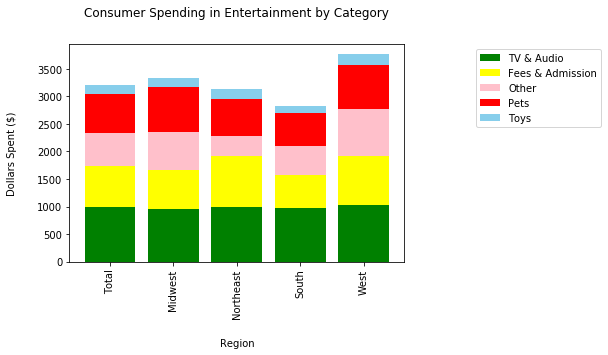

<Figure size 432x288 with 0 Axes>

In [9]:
#Could make pie charts for each region and the percent of entertainment spending by category
xlabels = lf.index
xl = np.arange(len(xlabels))
#print(t_df

audio = lf['Audio and visual equipment and services by Census']
fees = lf['Entertainment: fees and admissions by Census']
other = lf['Entertainment: other supplies, equip., & services by Census']
pets = lf['Pets by Census']
toys = lf['Toys, hobbies, and playground equipment by Census']

p1 = plt.bar(xlabels, audio, align='center', color ='green', label='TV & Audio')
p2 = plt.bar(xlabels, fees, align='center', color ='yellow', bottom=audio, label='Fees & Admission')
p3 = plt.bar(xlabels, other, align='center', color ='pink', bottom=[i+j for i,j in zip(audio, fees)], label='Other')
p4 = plt.bar(xlabels, pets, align='center', color ='red', bottom=[i+j+k for i,j,k in zip(audio, fees, other)], label='Pets')
p5 = plt.bar(xlabels, toys, align='center', color ='skyblue', bottom=[i+j+k+l for i,j,k,l in zip(audio, fees, other, pets)],label='Toys')

#stack plots
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.20,1), loc="upper left")
plt.title('Consumer Spending in Entertainment by Category', y=1.10)
plt.xlabel('Region', labelpad = 20)
plt.ylabel('Dollars Spent ($)', labelpad = 20)
plt.show()
plt.savefig("dollarexpenditure.png")

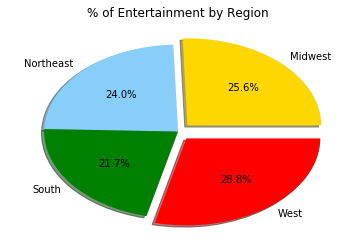

<Figure size 432x288 with 0 Axes>

In [7]:
# Build Pie Chart
labels = ["Midwest", "Northeast", "South", "West"] 
Entertainment_Total = [3341, 3133, 2832, 3763]
colors = ["gold", "lightskyblue", "green", "Red"] 
explode =(0.1, 0, 0, 0.1)

plt.pie(Entertainment_Total, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 0)

plt.title("% of Entertainment by Region")
# Show Figure
plt.show()

# Save Figure
plt.savefig("../Project1/pie.png")

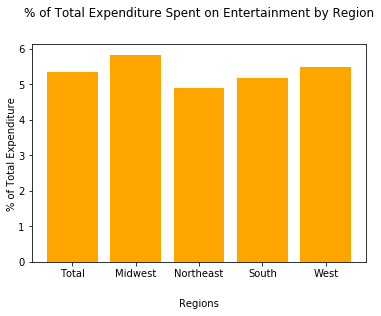

<Figure size 432x288 with 0 Axes>

In [8]:
entertainment = lf['Entertainment by Census']
total_expend = lf['Total average annual expenditures by Census']

percent_expenditure = (entertainment/total_expend) * 100

plt.bar(xlabels, percent_expenditure, color="orange", align="center")

plt.title("% of Total Expenditure Spent on Entertainment by Region", y =1.10)
plt.xlabel("Regions", labelpad = 20)
plt.ylabel("% of Total Expenditure", labelpad = 1)

plt.show()
plt.savefig("../Project1/percentexpenditure.png")